In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings 
warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_excel("WineQT.xlsx")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
# Identify numerical columns
numerical_cols = wine.select_dtypes(include=['number']).columns

# Display summary statistics
print(wine[numerical_cols].describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [6]:
print(wine[numerical_cols].skew())

fixed acidity           1.044930
volatile acidity        0.681547
citric acid             0.371561
residual sugar          4.361096
chlorides               6.026360
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
density                 0.102395
pH                      0.221138
sulphates               2.497266
alcohol                 0.863313
quality                 0.286792
Id                     -0.010419
dtype: float64


In [7]:
print(wine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [8]:
#fixing the outliers

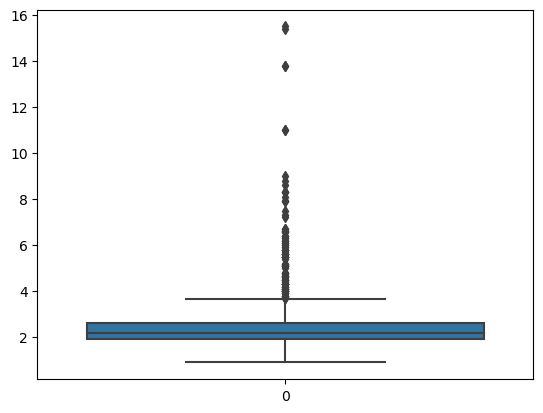

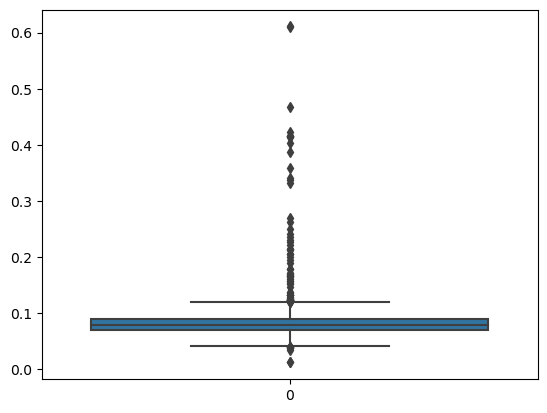

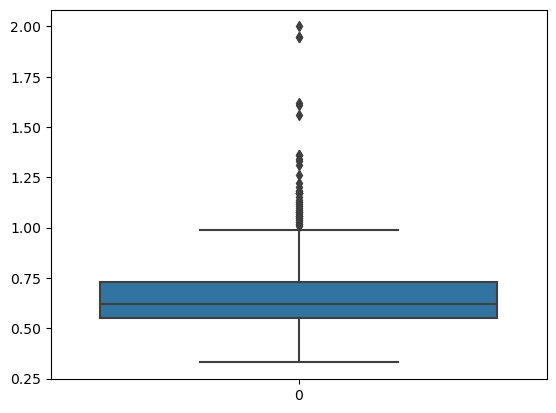

In [9]:
plt1= sns.boxplot(wine['residual sugar'])
plt.show()
plt2= sns.boxplot(wine['chlorides'])
plt.show()
plt3 =sns.boxplot(wine['sulphates'])
plt.show()

Original Data Shape: (886, 13)
After Capping: (886, 13)


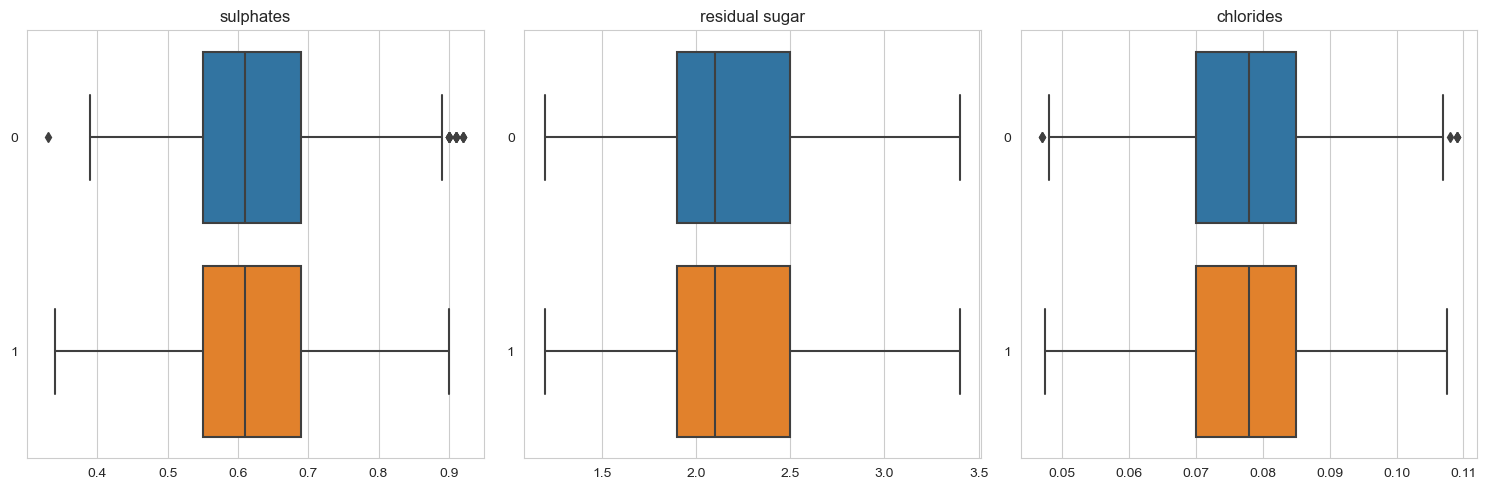

In [21]:
# Select columns for outlier handling
columns = ['sulphates', 'residual sugar', 'chlorides']

# calculate IQR and identify outliers
def detect_outliers(wine, col):
    Q1 = wine[col].quantile(0.25)
    Q3 = wine[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Removing Outliers
for col in columns:
    lower_bound, upper_bound = detect_outliers(wine, col)
    wine = wine[(wine[col] >= lower_bound) & (wine[col] <= upper_bound)]

# Trimming Outliers 
trimmed_wine = wine.copy()
for col in columns:
    lower_bound, upper_bound = detect_outliers(trimmed_wine, col)
    trimmed_wine[col] = trimmed_wine[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Capping Outliers
capped_wine = wine.copy()
for col in columns:
    lower_bound, upper_bound = detect_outliers(capped_wine, col)
    capped_wine[col] = capped_wine[col].clip(lower=lower_bound, upper=upper_bound)

# Display the cleaned data
print("Original Data Shape:", wine.shape)
print("After Capping:", capped_wine.shape)

# visualize the results
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=[wine[col], capped_wine[col]], orient='h')
    plt.title(col)
plt.tight_layout()
plt.show()


In [11]:
print(wine[numerical_cols].skew())

fixed acidity           1.010340
volatile acidity        0.585155
citric acid             0.409616
residual sugar          0.564367
chlorides               0.073860
free sulfur dioxide     1.014487
total sulfur dioxide    1.249822
density                -0.111588
pH                      0.121156
sulphates               0.661275
alcohol                 0.951567
quality                 0.397346
Id                     -0.030147
dtype: float64


In [12]:
#we have fixed the skewness and outliers in the data. 

In [13]:
# Separate features and target variable
X = wine.drop(columns=['quality'])
y = wine['quality']

# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

rf_results = {"accuracy": accuracy_rf, "classification_report": report_rf}
rf_report_df = pd.DataFrame(report_rf).transpose()
print("Random Forest Results:")
print(rf_report_df)

Random Forest Results:
              precision    recall  f1-score     support
3              0.000000  0.000000  0.000000    1.000000
4              0.000000  0.000000  0.000000    5.000000
5              0.740741  0.750000  0.745342   80.000000
6              0.622222  0.736842  0.674699   76.000000
7              0.692308  0.428571  0.529412   21.000000
8              0.500000  0.333333  0.400000    3.000000
accuracy       0.677419  0.677419  0.677419    0.677419
macro avg      0.425878  0.374791  0.391575  186.000000
weighted avg   0.659068  0.677419  0.662484  186.000000


In [15]:
# SGD Classifier
sgd_model = SGDClassifier(loss="log_loss", max_iter=1000, random_state=42)
sgd_model.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_model.predict(X_test_scaled)

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
report_sgd = classification_report(y_test, y_pred_sgd, output_dict=True)

sgd_results = {"accuracy": accuracy_sgd, "classification_report": report_sgd}
sgd_report_df = pd.DataFrame(report_sgd).transpose()
print("\nSGD Classifier Results:")
print(sgd_report_df)


SGD Classifier Results:
              precision    recall  f1-score     support
3              0.000000  0.000000  0.000000    1.000000
4              0.100000  0.200000  0.133333    5.000000
5              0.634409  0.737500  0.682081   80.000000
6              0.569444  0.539474  0.554054   76.000000
7              0.500000  0.238095  0.322581   21.000000
8              0.000000  0.000000  0.000000    3.000000
accuracy       0.569892  0.569892  0.569892    0.569892
macro avg      0.300642  0.285845  0.282008  186.000000
weighted avg   0.564680  0.569892  0.559760  186.000000


In [16]:
# Support Vector Classifier (SVC)
svc_model = SVC(kernel="linear", random_state=42)
svc_model.fit(X_train_scaled, y_train)
y_pred_svc = svc_model.predict(X_test_scaled)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
report_svc = classification_report(y_test, y_pred_svc, output_dict=True)

svc_results = {"accuracy": accuracy_svc, "classification_report": report_svc}
svc_report_df = pd.DataFrame(report_svc).transpose()
print("\nSVC Results:")
print(svc_report_df)


SVC Results:
              precision    recall  f1-score     support
3              0.000000  0.000000  0.000000    1.000000
4              0.000000  0.000000  0.000000    5.000000
5              0.652632  0.775000  0.708571   80.000000
6              0.538462  0.644737  0.586826   76.000000
7              0.000000  0.000000  0.000000   21.000000
8              0.000000  0.000000  0.000000    3.000000
accuracy       0.596774  0.596774  0.596774    0.596774
macro avg      0.198516  0.236623  0.215900  186.000000
weighted avg   0.500718  0.596774  0.544540  186.000000


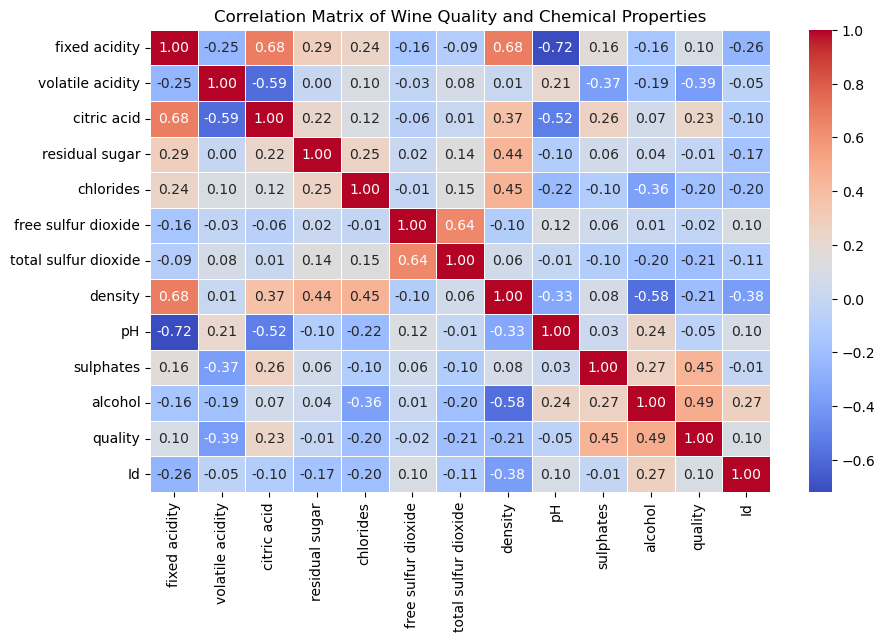

quality                 1.000000
alcohol                 0.487804
sulphates               0.447460
citric acid             0.234067
Id                      0.102667
fixed acidity           0.100205
residual sugar         -0.009839
free sulfur dioxide    -0.021596
pH                     -0.052926
chlorides              -0.195283
total sulfur dioxide   -0.207441
density                -0.214317
volatile acidity       -0.387397
Name: quality, dtype: float64

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = wine.corr()

# Extract correlation of features with wine quality
quality_correlation = correlation_matrix["quality"].sort_values(ascending=False)

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Wine Quality and Chemical Properties")
plt.show()

# Display correlation of features with quality
quality_correlation


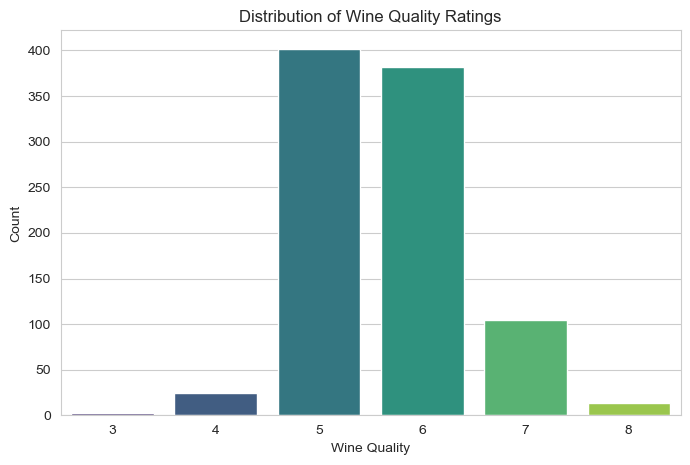

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for plots
sns.set_style("whitegrid")

# 1. Histogram of Wine Quality Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=wine["quality"], palette="viridis")
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()


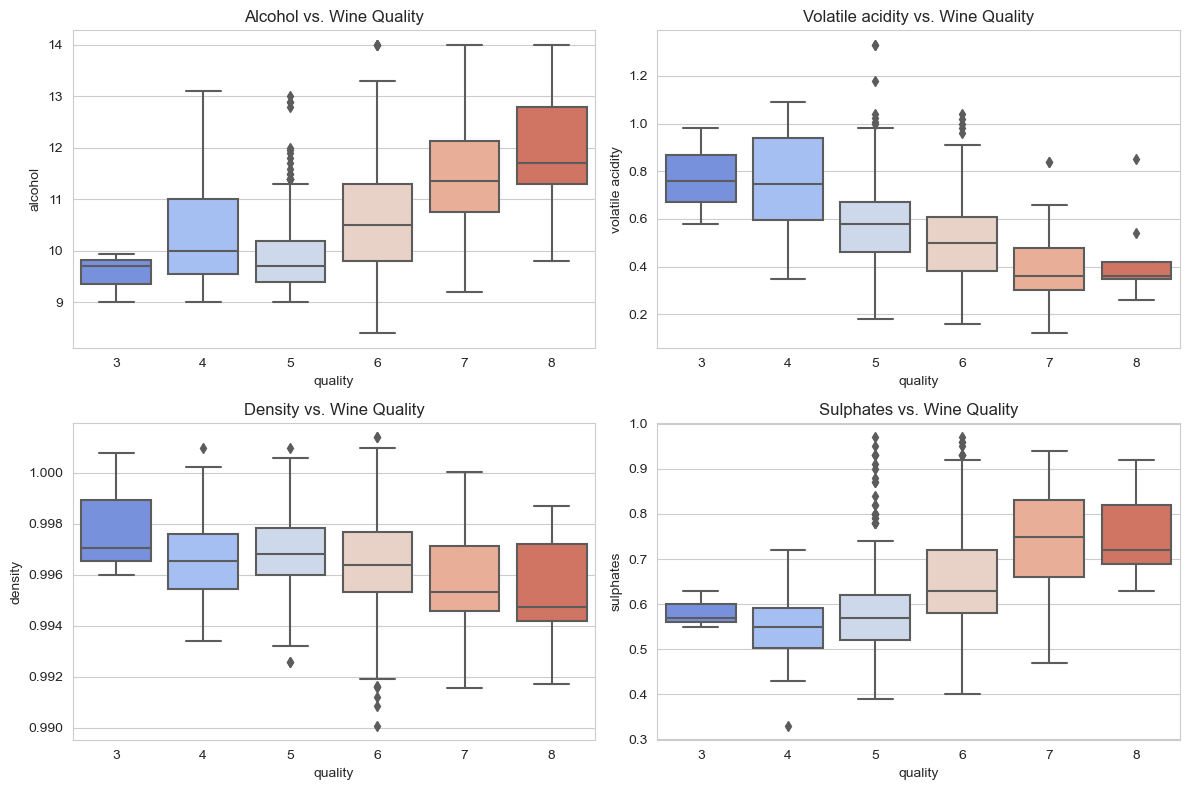

In [19]:
# 2. Boxplots of Key Features vs. Quality
key_features = ["alcohol", "volatile acidity", "density", "sulphates"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=wine["quality"], y=wine[feature], palette="coolwarm")
    plt.title(f"{feature.capitalize()} vs. Wine Quality")
plt.tight_layout()
plt.show()



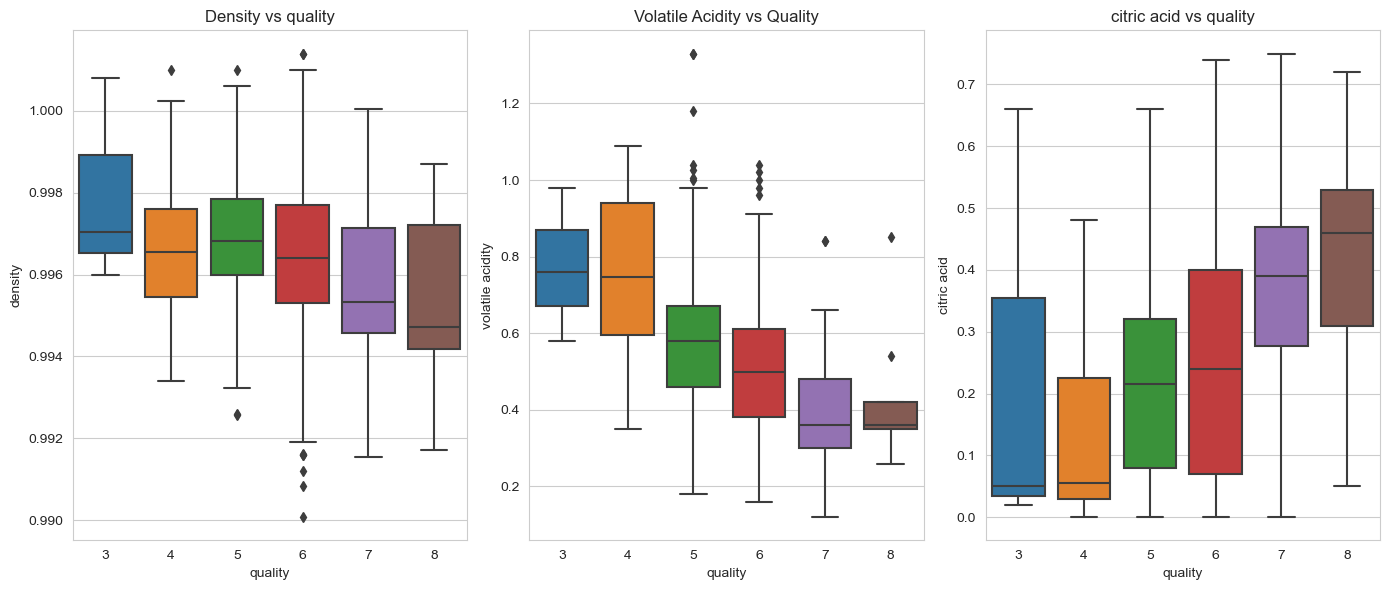

In [20]:
# 2. Boxplots: Distribution of chemical qualities for different quality ratings
plt.figure(figsize=(14, 6))

# Boxplot for Density
plt.subplot(1, 3, 1)
sns.boxplot(x='quality', y='density', data=wine)
plt.title('Density vs quality')

# Boxplot for Volatile Acidity
plt.subplot(1, 3, 2)
sns.boxplot(x='quality', y='volatile acidity', data=wine)
plt.title('Volatile Acidity vs Quality')

# Boxplot for Citric Acid
plt.subplot(1, 3, 3)
sns.boxplot(x='quality', y='citric acid', data=wine)
plt.title('citric acid vs quality')

plt.tight_layout()
plt.show()

